This project, you analyse dataset of more than 110k Brazilian patients from late April to early June 2016. Data shows that in 20% of scheduled appointments, the patient didn't show up. Our goal is trying to answer the question:
what are the factors leading to no_shows?
Is it the system or personal attributes to blame?

The report distinguishes between two groups of factors that might have significance: those related to the system, and personal attributes of the patients themselves.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import collections
from datetime import datetime
%matplotlib inline

# data wrangling
>In this section, we will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

In [16]:
# first let's load the data into a dataframe
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

et's have a look at the first few rows of the data using ___.head():___

In [17]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Display info about each column using **.info()** method.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


We notice that we have no bools. We also notice that some columns has object dtype instead of str, this is because Pandas stores pointers to strings in dataframes and series.
We can confirm that these objects are indeed strings with the following command:

In [19]:
[type(df['Gender'][0]), type(df['ScheduledDay'][0]), type(df['AppointmentDay'][0]), type(df['Neighbourhood'][0]), type(df['No-show'][0])]

[str, str, str, str, str]

Now let's check for null and duplicated values.

In [20]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [21]:
df.duplicated().sum()

0

We have no nulls nor duplicates, which is great.

Let's look further into the data, check unique values for each column.

In [22]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

We first notice that there are many Neighbourhood values in our data, this makes it less useful in our analysis.<br>
<br>

The second observation is that most columns are binary variables (categorical variables that take only two values), including our dependent variable (No-Show). This will affect our Exploratory Data Analysis, pie and bar charts will be more useful than histograms in most cases.
<br>
<br>
We also notice that ___Handcap___ have 5 unique values, according to Kaggle it should be 2 (0 or 1). let's investigate that further.

In [23]:
# function to get unique values
def unique(data):
 
    unique = []
     
    for v in data:
        if v not in unique:
            unique.append(v)

    for v in unique:
        print(v)

In [24]:
unique(df['Handcap'])

0
1
2
3
4


__Handcap__ values ranges from 0 to 4, I can think of two reasons for that:

>The system have 4 degrees of Handicaps: 1-4 , plus 0 for none.<br>
These are input errors.


Let's check how many strange values we have:

In [25]:
df['Handcap'].value_counts()

Handcap
0    108286
1      2042
2       183
3        13
4         3
Name: count, dtype: int64

The number of values of 2 or more are very few (less than 200 values), so they're probably input errors.

Finally, let's review some descriptive statistics of our data:

In [26]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Why is the minimum value of 'Age' is -1? this is an input error. Let's investigate:

In [28]:
df_1 = df[df['Age']<0]
df_1

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


We have only one input error in 'Age' column.

# Data cleaning

Let's start by cleaning input errors in 'Handcap' and 'Age' columns.

'Age' has only one input error of -1, we will replace it with 0:

In [29]:
df.Age.replace(to_replace=-1, value=0, inplace=True, limit=None, regex=False, method='pad')

C:\Users\User\AppData\Local\Temp\ipykernel_16456\2605131073.py:1: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df.Age.replace(to_replace=-1, value=0, inplace=True, limit=None, regex=False, method='pad')


Now for 'Handcap', since 1 stands for handicaps = True, these positive errors are most likely should have been 1. Although changing these inputs to 1 will increase the number of people in this category by 10%; they still represent very a small percentage of the whole dataset (2%), so this will probably have little effect.

In [30]:
df.Handcap.replace(to_replace=[2, 3, 4], value=1, inplace=True, limit=None, regex=False, method='pad')

C:\Users\User\AppData\Local\Temp\ipykernel_16456\3835527315.py:1: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df.Handcap.replace(to_replace=[2, 3, 4], value=1, inplace=True, limit=None, regex=False, method='pad')


Before continuing our cleaning, we need to think about what we need from the dataset. The report explores 'No-show' as a dependent variable. As for my choices of the independent variables, there are two groups:

1. Variables related to the system: (Scholarship, SMS_received, if ScheduledDay == AppointmentDay).
2. Variables related to the patient: (Age, Gender, Medical conditions).

>This requires creating a new variable to check if ScheduledDay == AppointmentDay. We can use datetime library, but since both 'ScheduledDay' and 'AppointmentDay' columns are in ISO 8601 standard format, it's much simpler to use string slicing.

In [31]:
# this is how to create a new list of ScheduledDay == AppointmentDay bool
# first, create lists of ScheduledDay and AppointmentDay series
ScheduledDay = list(df['ScheduledDay'])
AppointmentDay = list(df['AppointmentDay'])

# next, create a combined list of them
dates = list(zip(ScheduledDay, AppointmentDay))
dates[:10]

[('2016-04-29T18:38:08Z', '2016-04-29T00:00:00Z'),
 ('2016-04-29T16:08:27Z', '2016-04-29T00:00:00Z'),
 ('2016-04-29T16:19:04Z', '2016-04-29T00:00:00Z'),
 ('2016-04-29T17:29:31Z', '2016-04-29T00:00:00Z'),
 ('2016-04-29T16:07:23Z', '2016-04-29T00:00:00Z'),
 ('2016-04-27T08:36:51Z', '2016-04-29T00:00:00Z'),
 ('2016-04-27T15:05:12Z', '2016-04-29T00:00:00Z'),
 ('2016-04-27T15:39:58Z', '2016-04-29T00:00:00Z'),
 ('2016-04-29T08:02:16Z', '2016-04-29T00:00:00Z'),
 ('2016-04-27T12:48:25Z', '2016-04-29T00:00:00Z')]

Now we create a list of our desired bool

In [32]:
same_test = []
for sday, aday in dates:
    same = sday[5:10] == aday[5:10]
    same_test.append(same)
same_test[:10]

[True, True, True, True, True, False, False, False, True, False]

let's convert same_test values to 1 or 0 to be consistent with the data.

In [33]:
sameday = []
for v in same_test:
    if v == True:
        v = 1
    else:
        v = 0
    sameday.append(v)
sameday[:10]

[1, 1, 1, 1, 1, 0, 0, 0, 1, 0]

In [34]:
sameday = np.array(sameday)
df['SameDay'] = sameday
df['SameDay']

0         1
1         1
2         1
3         1
4         1
         ..
110522    0
110523    0
110524    0
110525    0
110526    0
Name: SameDay, Length: 110527, dtype: int32

We will drop all columns that we don't need.

In [35]:
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay','Neighbourhood'], axis=1, inplace=True)

No-show is a bad name to a variable, let's change that. We will also change columns to lowercase.

In [36]:
df.rename(columns={'No-show':'Noshow'}, inplace=True)
df= df.rename(columns=str.lower)

Now, let's rearrange the columns:

In [37]:
cols = df.columns.tolist()
cols

['gender',
 'age',
 'scholarship',
 'hipertension',
 'diabetes',
 'alcoholism',
 'handcap',
 'sms_received',
 'noshow',
 'sameday']

In [38]:
cols = ['noshow', 'gender', 'age', 'hipertension', 'diabetes', 'alcoholism', 'handcap',
 'scholarship', 'sms_received','sameday']
df = df[cols]
df.head()

,noshow,gender,age,hipertension,diabetes,alcoholism,handcap,scholarship,sms_received,sameday
0,No,F,62,1,0,0,0,0,0,1
1,No,M,56,0,0,0,0,0,0,1
2,No,F,62,0,0,0,0,0,0,1
3,No,F,8,0,0,0,0,0,0,1
4,No,F,56,1,1,0,0,0,0,1


Finally, let's convert noshow and gender to dummy variables (change values to 0 and 1) so we can calculate the correlation coefficients.

In [39]:
df.noshow.replace(to_replace=['No', 'Yes'], value=[0, 1], inplace=True)
df.gender.replace(to_replace=['F', 'M'], value=[0, 1], inplace=True)

This is our cleaned DataFrame:

In [40]:
df.head()

,noshow,gender,age,hipertension,diabetes,alcoholism,handcap,scholarship,sms_received,sameday
0,0,0,62,1,0,0,0,0,0,1
1,0,1,56,0,0,0,0,0,0,1
2,0,0,62,0,0,0,0,0,0,1
3,0,0,8,0,0,0,0,0,0,1
4,0,0,56,1,1,0,0,0,0,1


# Exploration Data Analysis

>Now that we've trimmed and cleaned the data, we're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions.

>It's important to note that this analysis focus is on the correlation between our variables. This is not enough to assume there is a causal relation between. Further studies using inferential statistics is required for that.

The main problem that this report discuss is the high rate of no_show patient in the Brazilian healthcare system. Let's explore our dependent variable noshow.

First, let's create masks according to noshow values

In [41]:
miss = df.noshow == 1
show = df.noshow == 0

Explore noshow variable with a pie chart using matplotlib

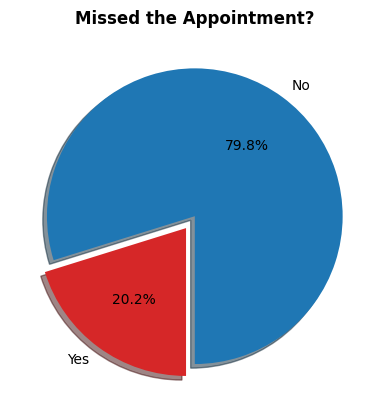

In [42]:
# plotting the pie chart
plt.pie(df['noshow'].value_counts(), labels = ['No', 'Yes'], colors=['tab:blue', 'tab:red'], 
        startangle=270, shadow = True, explode = (0, 0.1),
        radius = 1.0, autopct = '%1.1f%%')
# plot title
plt.title('Missed the Appointment?', fontweight="bold")
# showing the plot
plt.show()

More than 20% of scheduled appointments had no_shows, why?

Let's start to check the correlation matrix:

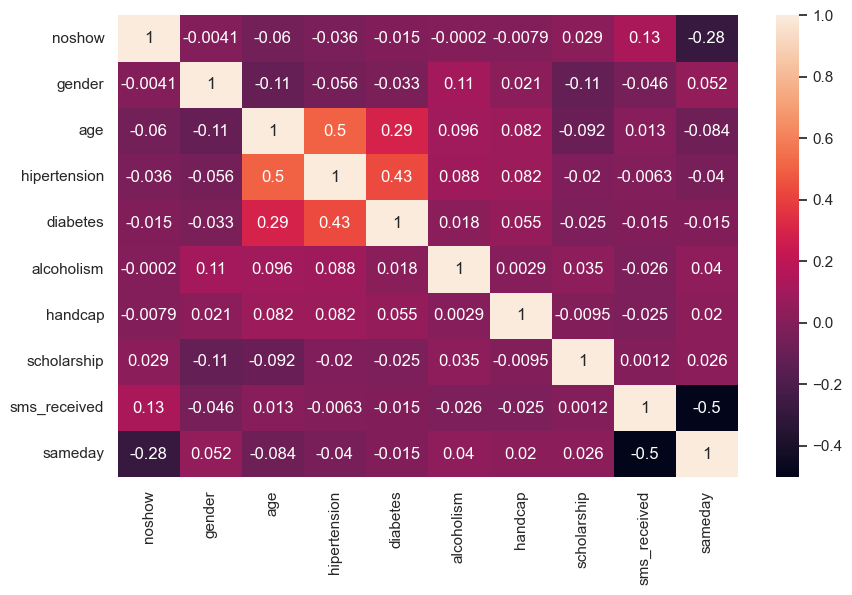

In [43]:
corrMatrix = df.corr()
sns.set(rc={'figure.figsize':(10,6)})
sns.heatmap(corrMatrix, annot=True)
plt.show()

Now to our questions.

### Analysis Question 1 Is the System Responsible for the High Rate of No-Shows

We will investigate three variables: __scholarship, sms_received and sameday

1. Scholarship (Bolsa Família)

Bolsa Família is a social welfare program of the Government of Brazil. It provides financial aid to poor Brazilian families.

scholarship = 1 for patients who receive funds from this program.
This totals to 9.8% of the dataset as shown in the pie chart below:

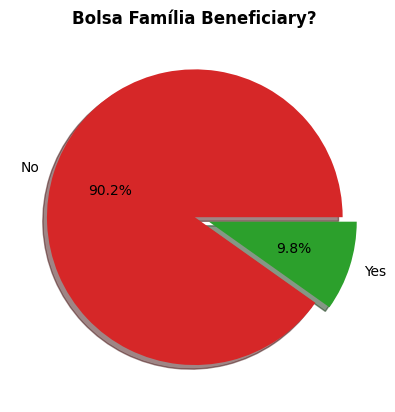

In [44]:
# first line resets seaborn charts to original size
sns.reset_orig()

plt.pie(df['scholarship'].value_counts(), labels = ['No', 'Yes'], colors=['tab:red', 'tab:green'], 
        startangle=0, shadow = True, explode = (0, 0.1),
        radius = 1.0, autopct = '%1.1f%%')

plt.title('Bolsa Família Beneficiary?', fontweight="bold")

plt.show()

The correlation coefficient between scholarship and noshow is very low __0.029__. We can't notice differences in the no_show rate between those who benefit from 'Bolsa Família' and those who don't.

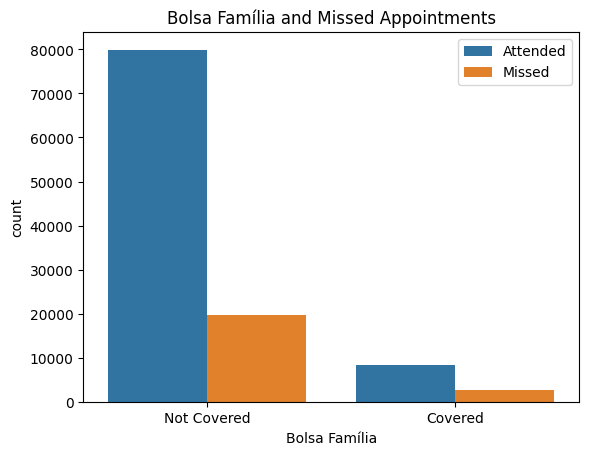

In [45]:
ax = sns.countplot(x="scholarship", hue="noshow", data=df)
ax.set(title='Bolsa Família and Missed Appointments')
plt.xticks([0, 1], ['Not Covered', 'Covered'])
ax.set_xlabel('Bolsa Família')
L=plt.legend()
L.get_texts()[0].set_text('Attended')
L.get_texts()[1].set_text('Missed')
plt.show()

2. __SMS_Received__ <br>


Does sending SMS reminders to a patient decrease the chance of no_show? 32.1% of our dataset received an SMS as shown here:

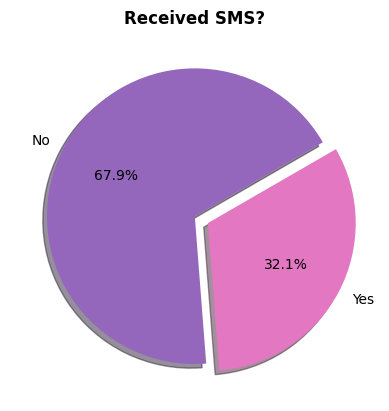

In [46]:
plt.pie(df['sms_received'].value_counts(), labels = ['No', 'Yes'], colors=['tab:purple', 'tab:pink'], 
        startangle=30, shadow = True, explode = (0, 0.1),
        radius = 1.0, autopct = '%1.1f%%')

plt.title('Received SMS?', fontweight="bold")
    
    
plt.show()

There is a very weak positive correlation between noshow and sms_received

In [47]:
df['noshow'].corr(df['sms_received'])

0.12643065757314442

Since __noshow = 1__ in the case of no_show. This means there is a slight higher chance of no_show for those who received an SMS.

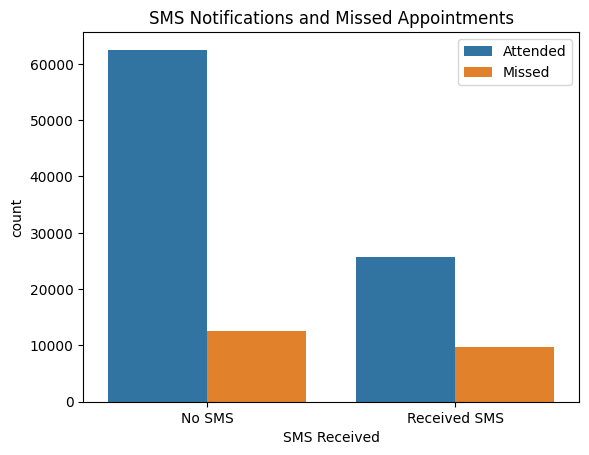

In [48]:
ax = sns.countplot(x="sms_received", hue="noshow", data=df)
ax.set(title='SMS Notifications and Missed Appointments')
plt.xticks([0, 1], ['No SMS', 'Received SMS'])
ax.set_xlabel('SMS Received')
L=plt.legend()
L.get_texts()[0].set_text('Attended')
L.get_texts()[1].set_text('Missed')
plt.show()

3. __Scheduled for the Same Day__


If the patients got their appointment at the same day of booking, will that make them less likley to miss?
34.9% got their appointment on the same day.

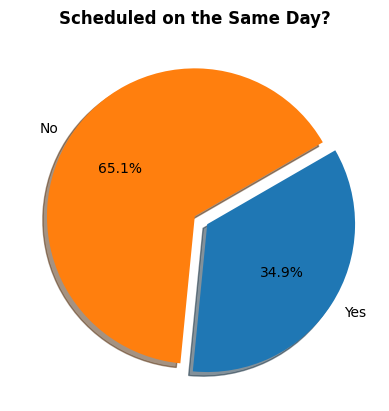

In [49]:
plt.pie(df['sameday'].value_counts(), labels = ['No', 'Yes'], colors=['tab:orange', 'tab:blue'], 
        startangle=30, shadow = True, explode = (0, 0.1),
        radius = 1.0, autopct = '%1.1f%%')
  
plt.title('Scheduled on the Same Day?', fontweight="bold")
     
plt.show()

There is a negative correlation between noshow and sameday

In [50]:
df['noshow'].corr(df['sameday'])

-0.2834864064340584

Though the correlation is somewhat weak, it's the highest in the correlation matrix.

This negative correlation means that patients who got their appointments on the same day are less likely to miss.

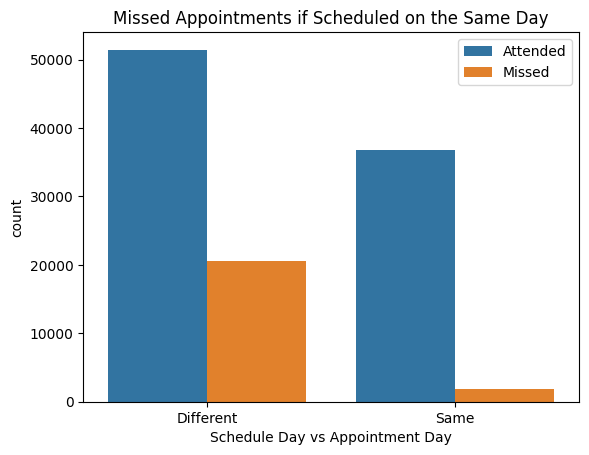

In [51]:
ax = sns.countplot(x="sameday", hue="noshow", data=df)
ax.set(title='Missed Appointments if Scheduled on the Same Day')
plt.xticks([0, 1], ['Different', 'Same'])
ax.set_xlabel('Schedule Day vs Appointment Day')
L=plt.legend()
L.get_texts()[0].set_text('Attended')
L.get_texts()[1].set_text('Missed')
plt.show()

# Analysis Question 2 Are Patients' Attributes Responsible for the High Rate of No-Shows

Now we will investigate ___Age, Gender___ and four medical conditions for the patients

1.  __Age__


age is our only numerical variable in the dataset. Let's start by checking its histogram.

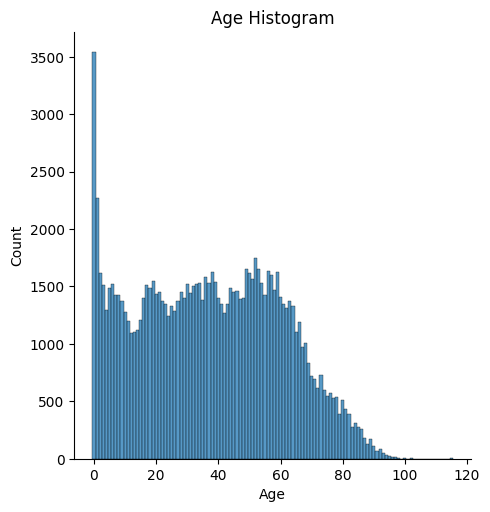

In [56]:
sns.displot(df, x="age", discrete=True).set(title='Age Histogram', xlabel='Age');
plt.show()


The number of newborn and children up to 4 years is considerably higher, let's investigate further:

In [57]:
(df['age']<=4).value_counts()

age
False    100285
True      10242
Name: count, dtype: int64

This is age boxplot:

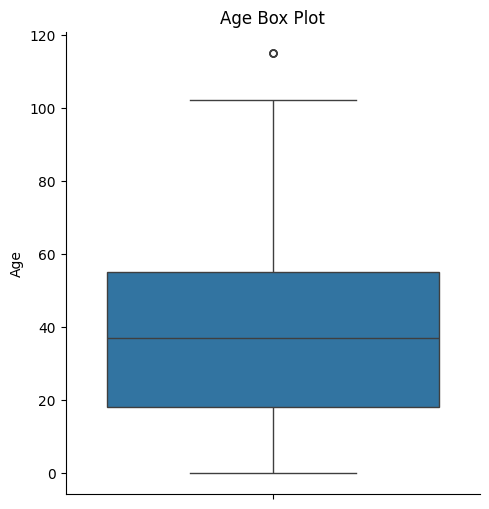

In [58]:
sns.catplot(y="age", kind="box", data=df).set(title='Age Box Plot', ylabel='Age');
plt.show()

There is almost no correlation between noshow and age.

In [59]:
df['noshow'].corr(df['age'])

-0.06032036552755501

We can still comare the age of our two groups:

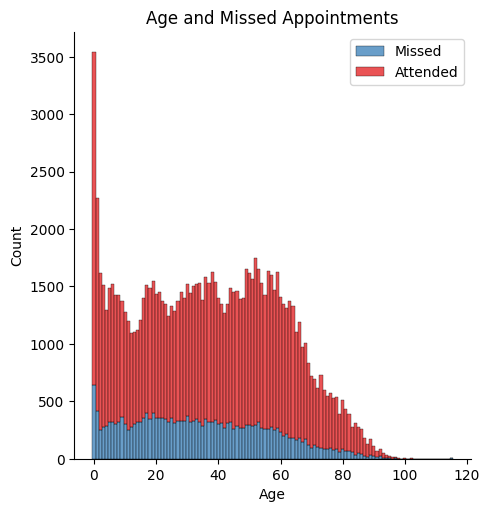

In [60]:
# both histograms on the same plot
ax=sns.displot(df, x="age", hue="noshow", multiple="stack", discrete=True, legend=False, palette="Set1").set(title='Age and Missed Appointments', xlabel='Age');
plt.legend(labels=["Missed","Attended"])
plt.show()

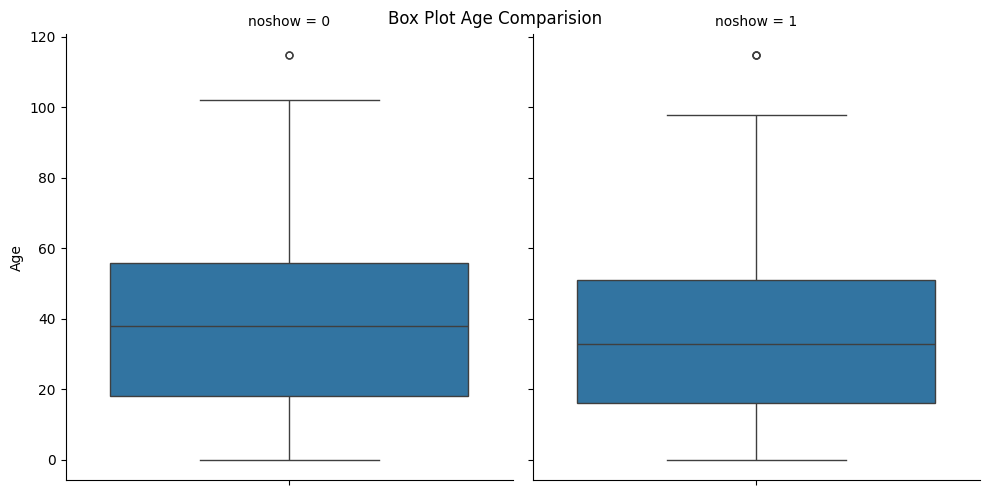

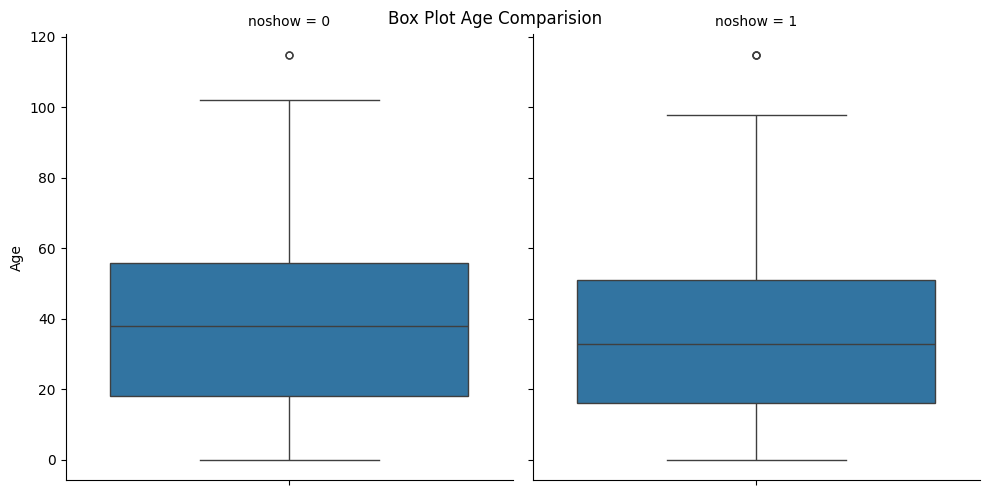

In [62]:
# boxplot for each group
ax=sns.catplot(y="age", col="noshow",kind="box", data=df);
ax.set_axis_labels("", "Age")
ax.fig.suptitle('Box Plot Age Comparision')
plt.show()

From the above boxplot and the below code, we find that patients who missed their appointments are younger (on average) than those who showed.

In [63]:
[df.age[miss].mean(), df.age[show].mean()]

[34.31766656212196, 37.79015508797388]

2. __Gender__


gender takes 0 for females, and 1 for males. Female patients formed 65% of the dataset.

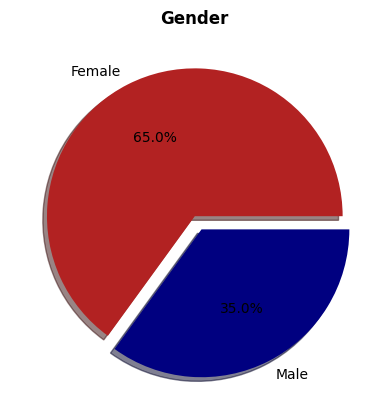

In [64]:
plt.pie(df['gender'].value_counts(), labels = ['Female', 'Male'], colors=['firebrick', 'navy'], 
        startangle=0, shadow = True, explode = (0, 0.1),
        radius = 1.0, autopct = '%1.1f%%')

plt.title('Gender', fontweight="bold")

plt.show()

There is no or weak correlation between noshow and gender

In [65]:
df['noshow'].corr(df['gender'])

-0.004118633199373544

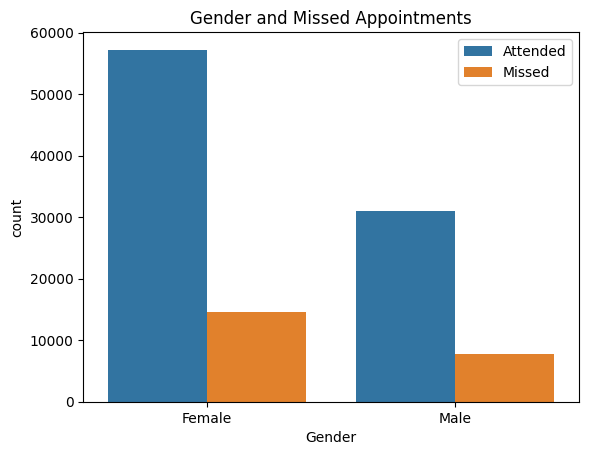

In [66]:
ax = sns.countplot(x="gender", hue="noshow", data=df)
ax.set(title='Gender and Missed Appointments')
plt.xticks([0, 1], ['Female', 'Male'])
ax.set_xlabel('Gender')
L=plt.legend()
L.get_texts()[0].set_text('Attended')
L.get_texts()[1].set_text('Missed')
plt.show()

Data shows that gender is not a decisive factor in our question.

3. __Health Condition__

We have four types of health problems in our dataset. Of those, we will examine hipertension and diabetes, based on their prevalence and the correlation matrix.

I. __Hypertension__

19.7% of patients had hypertension, but there is no correlation with noshow.

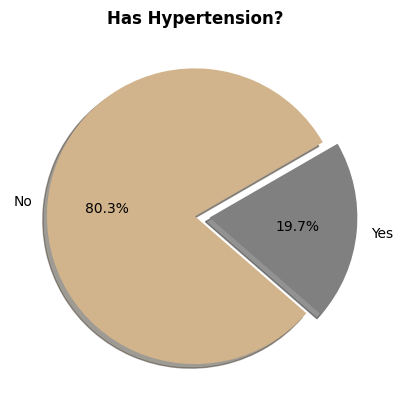

In [67]:
plt.pie(df['hipertension'].value_counts(), labels = ['No', 'Yes'], colors=['tan', 'grey'], 
        startangle=30, shadow = True, explode = (0, 0.1),
        radius = 1.0, autopct = '%1.1f%%')
  
plt.title('Has Hypertension?', fontweight="bold")
     
plt.show()

In [68]:
df['noshow'].corr(df['hipertension'])

-0.03570117734501487

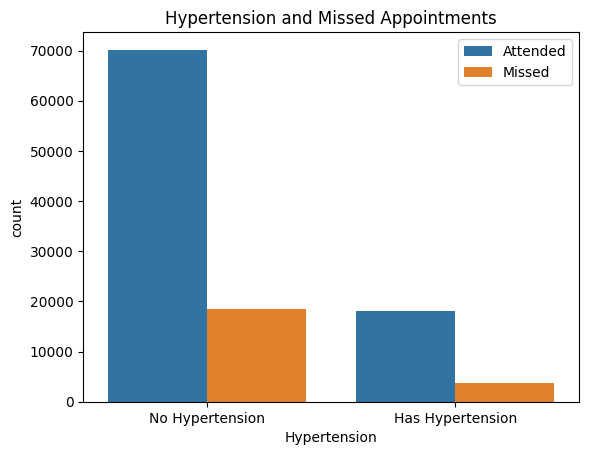

In [69]:
ax = sns.countplot(x="hipertension", hue="noshow", data=df)
ax.set(title='Hypertension and Missed Appointments')
plt.xticks([0, 1], ['No Hypertension', 'Has Hypertension'])
ax.set_xlabel('Hypertension')
L=plt.legend()
L.get_texts()[0].set_text('Attended')
L.get_texts()[1].set_text('Missed')
plt.show()

II. __Diabetes__

7.2% of patients had diabetes, but there is no correlation with noshow

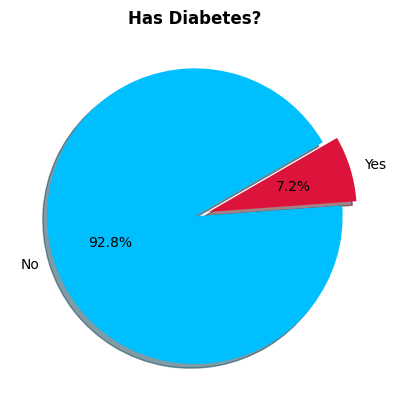

In [70]:
plt.pie(df['diabetes'].value_counts(), labels = ['No', 'Yes'], colors=['deepskyblue', 'crimson'], 
        startangle=30, shadow = True, explode = (0, 0.1),
        radius = 1.0, autopct = '%1.1f%%')
  
plt.title('Has Diabetes?', fontweight="bold")
     
plt.show()

In [71]:
df['noshow'].corr(df['diabetes'])

-0.015179943820773732

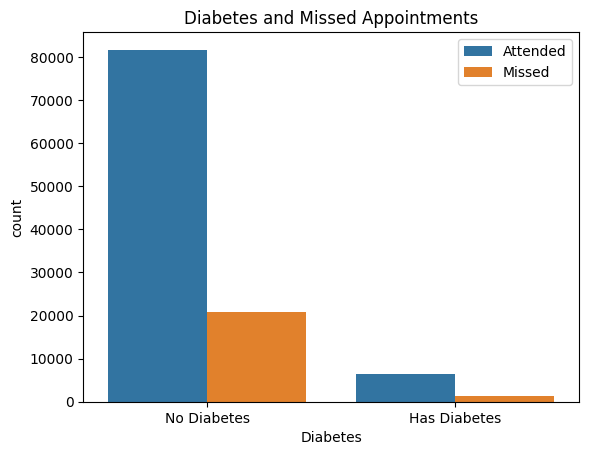

In [72]:
ax = sns.countplot(x="diabetes", hue="noshow", data=df)
ax.set(title='Diabetes and Missed Appointments')
plt.xticks([0, 1], ['No Diabetes', 'Has Diabetes'])
ax.set_xlabel('Diabetes')
L=plt.legend()
L.get_texts()[0].set_text('Attended')
L.get_texts()[1].set_text('Missed')
plt.show()

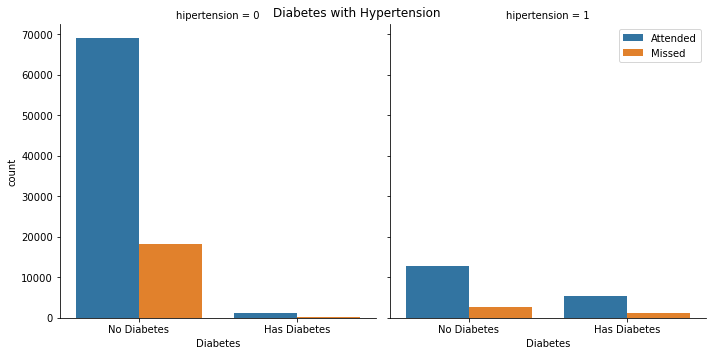

In [190]:
ax = sns.catplot(x="diabetes", hue="noshow", col="hipertension", kind="count", data=df, legend=False)
ax.set_axis_labels("Diabetes", "count")
plt.xticks([0, 1], ['No Diabetes', 'Has Diabetes'])
L=plt.legend()
L.get_texts()[0].set_text('Attended')
L.get_texts()[1].set_text('Missed')
ax.fig.suptitle('Diabetes with Hypertension');

Actually, if a patient suffer from both illnesses, he much less likely to miss the appointment.

# conclusion

Results
>This report examined a dataset of Brazilian patients, trying to figure out what are the factors that correlates with missing appointments.

>It found that the most important factor was whether the patient got his appointment at the same day of booking. This factor was negatively correlated with no_show cases, meaning that there were less no_shows when the patient was scheduled on the same day.

>Regarding the system, the report found that sending SMS notifications didn't help. In fact, it was weakly positively correlated with no_show cases. Implying that those who received an SMS were slightly more likely to miss. Receiving benefits from Bolsa Família didn't seem to correlate with no_show cases.

>Personal attributes didn't seem to correlate with no_shows. Except that patients who missed their appointments were younger in general of those who didn't. It is also noted that having multiple illnesses seems to correlate with less no_shows.

Limitations
>Most columns in the dataset are binary variables (categorical variables that take only two values), including the dependent variable noshow. This limits the statistical methods that can be used to analyze the data.

>Some results were counter-intuitive, The analysis found that there is a slight higher chance of no_show for those who received an SMS. The nature of the data prevents further investigation.

>It's important to note that this analysis focus is on the correlation between the variables. This is not enough to assume there is a causal relation between them. Further studies using inferential statistics is required for that. Also, most correlations were weak due to the categorical nature of the variables.